In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import numpy as np

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/2664034715.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import re

In [4]:
# Load the dataset
df = pd.read_csv("./train.csv")
df.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionNumber    10966 non-null  int64  
 1   UserID               10966 non-null  int64  
 2   Age                  10966 non-null  int64  
 3   Gender               10966 non-null  object 
 4   Occupation           10966 non-null  object 
 5   EducationLevel       10966 non-null  object 
 6   MaritalStatus        10966 non-null  object 
 7   NumDependents        10966 non-null  int64  
 8   Income               10966 non-null  object 
 9   Expenditure          10966 non-null  object 
 10  GiftsTransaction     10966 non-null  object 
 11  TransactionDate      10966 non-null  object 
 12  TransactionTime      10966 non-null  object 
 13  TransactionAmount    10966 non-null  object 
 14  MerchantID           10966 non-null  object 
 15  TransactionType      10966 non-null 

In [6]:
df.shape

(10966, 24)

In [7]:
df.describe()

,TransactionNumber,UserID,Age,NumDependents,Latitude,Longitude,UserTenure,IsFraud
count,10966.000000,10966.000000,10966.000000,10966.000000,10923.000000,10923.000000,10966.000000,10966.000000
mean,9117.500091,2483.885282,2751.845887,1.995714,-30.363255,141.254786,60.786157,0.364308
std,5293.669640,1429.402615,9730.988917,1.408035,6.962819,11.268395,34.254477,0.481257
min,1.000000,1.000000,-68.000000,0.000000,-41.640079,-112.026050,1.000000,0.000000
25%,4516.250000,1253.000000,26.000000,1.000000,-37.020100,142.702789,31.000000,0.000000
50%,9120.500000,2471.000000,34.000000,2.000000,-31.840233,144.964600,61.000000,0.000000
75%,13710.750000,3727.000000,43.000000,3.000000,-25.042261,145.612793,90.000000,1.000000
max,18277.000000,5000.000000,67000.000000,4.000000,57.851580,149.012375,119.000000,1.000000


In [8]:
df.isnull().sum()

TransactionNumber       0
UserID                  0
Age                     0
Gender                  0
Occupation              0
EducationLevel          0
MaritalStatus           0
NumDependents           0
Income                  0
Expenditure             0
GiftsTransaction        0
TransactionDate         0
TransactionTime         0
TransactionAmount       0
MerchantID              0
TransactionType         0
TransactionLocation     0
DeviceType              0
Latitude               43
Longitude              43
EmailDomain             0
Terrorism               0
UserTenure              0
IsFraud                 0
dtype: int64

In [9]:
df['Latitude'].duplicated().sum()

10931

In [10]:
df['Longitude'].duplicated().sum()

10931

In [11]:
df.duplicated().sum()

0

In [12]:
df["Gender"].value_counts()

Gender
Male           4887
Female         4426
isnotfemale     292
he              268
man             263
fem             220
she             207
woman           206
isnotmale       197
Name: count, dtype: int64

In [13]:
df["UserID"].duplicated().sum()

6543

In [14]:
def check_valid_email(email):
    email = email.strip()
    regex = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w+$'
    if re.match(regex, email):
        return email

    else:
        return "not an email"

df['EmailDomain'].apply(check_valid_email)

0              jon44@disposable.com
1              emilyreese@gmail.com
2                fordevan@gmail.com
3        kathleenlewis@tempmail.com
4           kristinawhite@gmail.com
                    ...            
10961           rpalmer@outlook.com
10962               rcruz@yahoo.com
10963         dawnmendoza@yahoo.com
10964      miranda86@disposable.com
10965             brian94@gmail.com
Name: EmailDomain, Length: 10966, dtype: object

In [15]:
mask = df['EmailDomain'] == "not an email"
count = len(df[mask])
print(count)

0


In [16]:
for email in df["EmailDomain"]:
    if email.strip() == 'not an email':
        count +=1

print (count) 


0


In [17]:
df['Terrorism'].value_counts()

Terrorism
False    7623
True     3343
Name: count, dtype: int64

In [18]:
df['Income'].describe()

count             10966
unique             6546
top       AU$ 125722.27
freq                  7
Name: Income, dtype: object

In [19]:
df['Expenditure'].describe()

count            10966
unique            7709
top       AU$ 24202.02
freq                 6
Name: Expenditure, dtype: object

In [20]:
df['Occupation'].value_counts()

Occupation
Professional    5384
Student         3321
Unemployed      1151
Retired         1110
Name: count, dtype: int64

In [21]:
df['EducationLevel'].value_counts()

EducationLevel
Bachelor       4367
High School    4331
Master         1641
PhD             627
Name: count, dtype: int64

In [22]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     5366
Single      4418
Divorced     626
Widowed      556
Name: count, dtype: int64

In [23]:
df['NumDependents'].describe()

count    10966.000000
mean         1.995714
std          1.408035
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: NumDependents, dtype: float64

In [24]:
df["MerchantID"].duplicated().sum()

10958

In [25]:
df['IsFraud'].value_counts()

IsFraud
0    6971
1    3995
Name: count, dtype: int64

In [26]:
df['GiftsTransaction'].describe()

count           10966
unique           7718
top       2911.07 GBP
freq                6
Name: GiftsTransaction, dtype: object

In [27]:
df['TransactionNumber'].duplicated().sum()


0

In [28]:
df['TransactionType'].value_counts()

TransactionType
Purchase      5440
Transfer      2244
Withdrawal    2159
Payment       1123
Name: count, dtype: int64

In [29]:
df['TransactionTime'].describe()

count        10966
unique        9851
top       23:59:59
freq           315
Name: TransactionTime, dtype: object

In [30]:
df['TransactionAmount'].describe()

count         10966
unique        10510
top       AU$ 30.61
freq              4
Name: TransactionAmount, dtype: object

In [31]:
df['TransactionLocation'].value_counts()

TransactionLocation
Canberra         1380
Darwin           1369
Adelaide         1368
Sydney           1349
Hobart           1349
Brisbane         1330
Perth            1278
Melbourne         984
Melb               91
melbourne          85
Mel                76
MLB                74
Melburn            63
perth              14
BNE                13
hobart             12
brisbane           12
Bne                12
canberra            9
CBR                 9
PTH                 8
Pth                 8
SYD                 8
Drw                 8
DRW                 8
Cbr                 7
Adl                 6
Adelaide City       6
HBT                 6
adl                 6
Syd                 6
sydney              5
darwin              4
Hbt                 3
Name: count, dtype: int64

In [32]:
df['UserTenure'].describe()

count    10966.000000
mean        60.786157
std         34.254477
min          1.000000
25%         31.000000
50%         61.000000
75%         90.000000
max        119.000000
Name: UserTenure, dtype: float64

In [33]:
df['DeviceType'].value_counts()

DeviceType
Mobile        4893
Desktop       3325
Tablet        1125
galaxys7       344
iphone 15      340
android        338
smartphone     306
mob            295
Name: count, dtype: int64

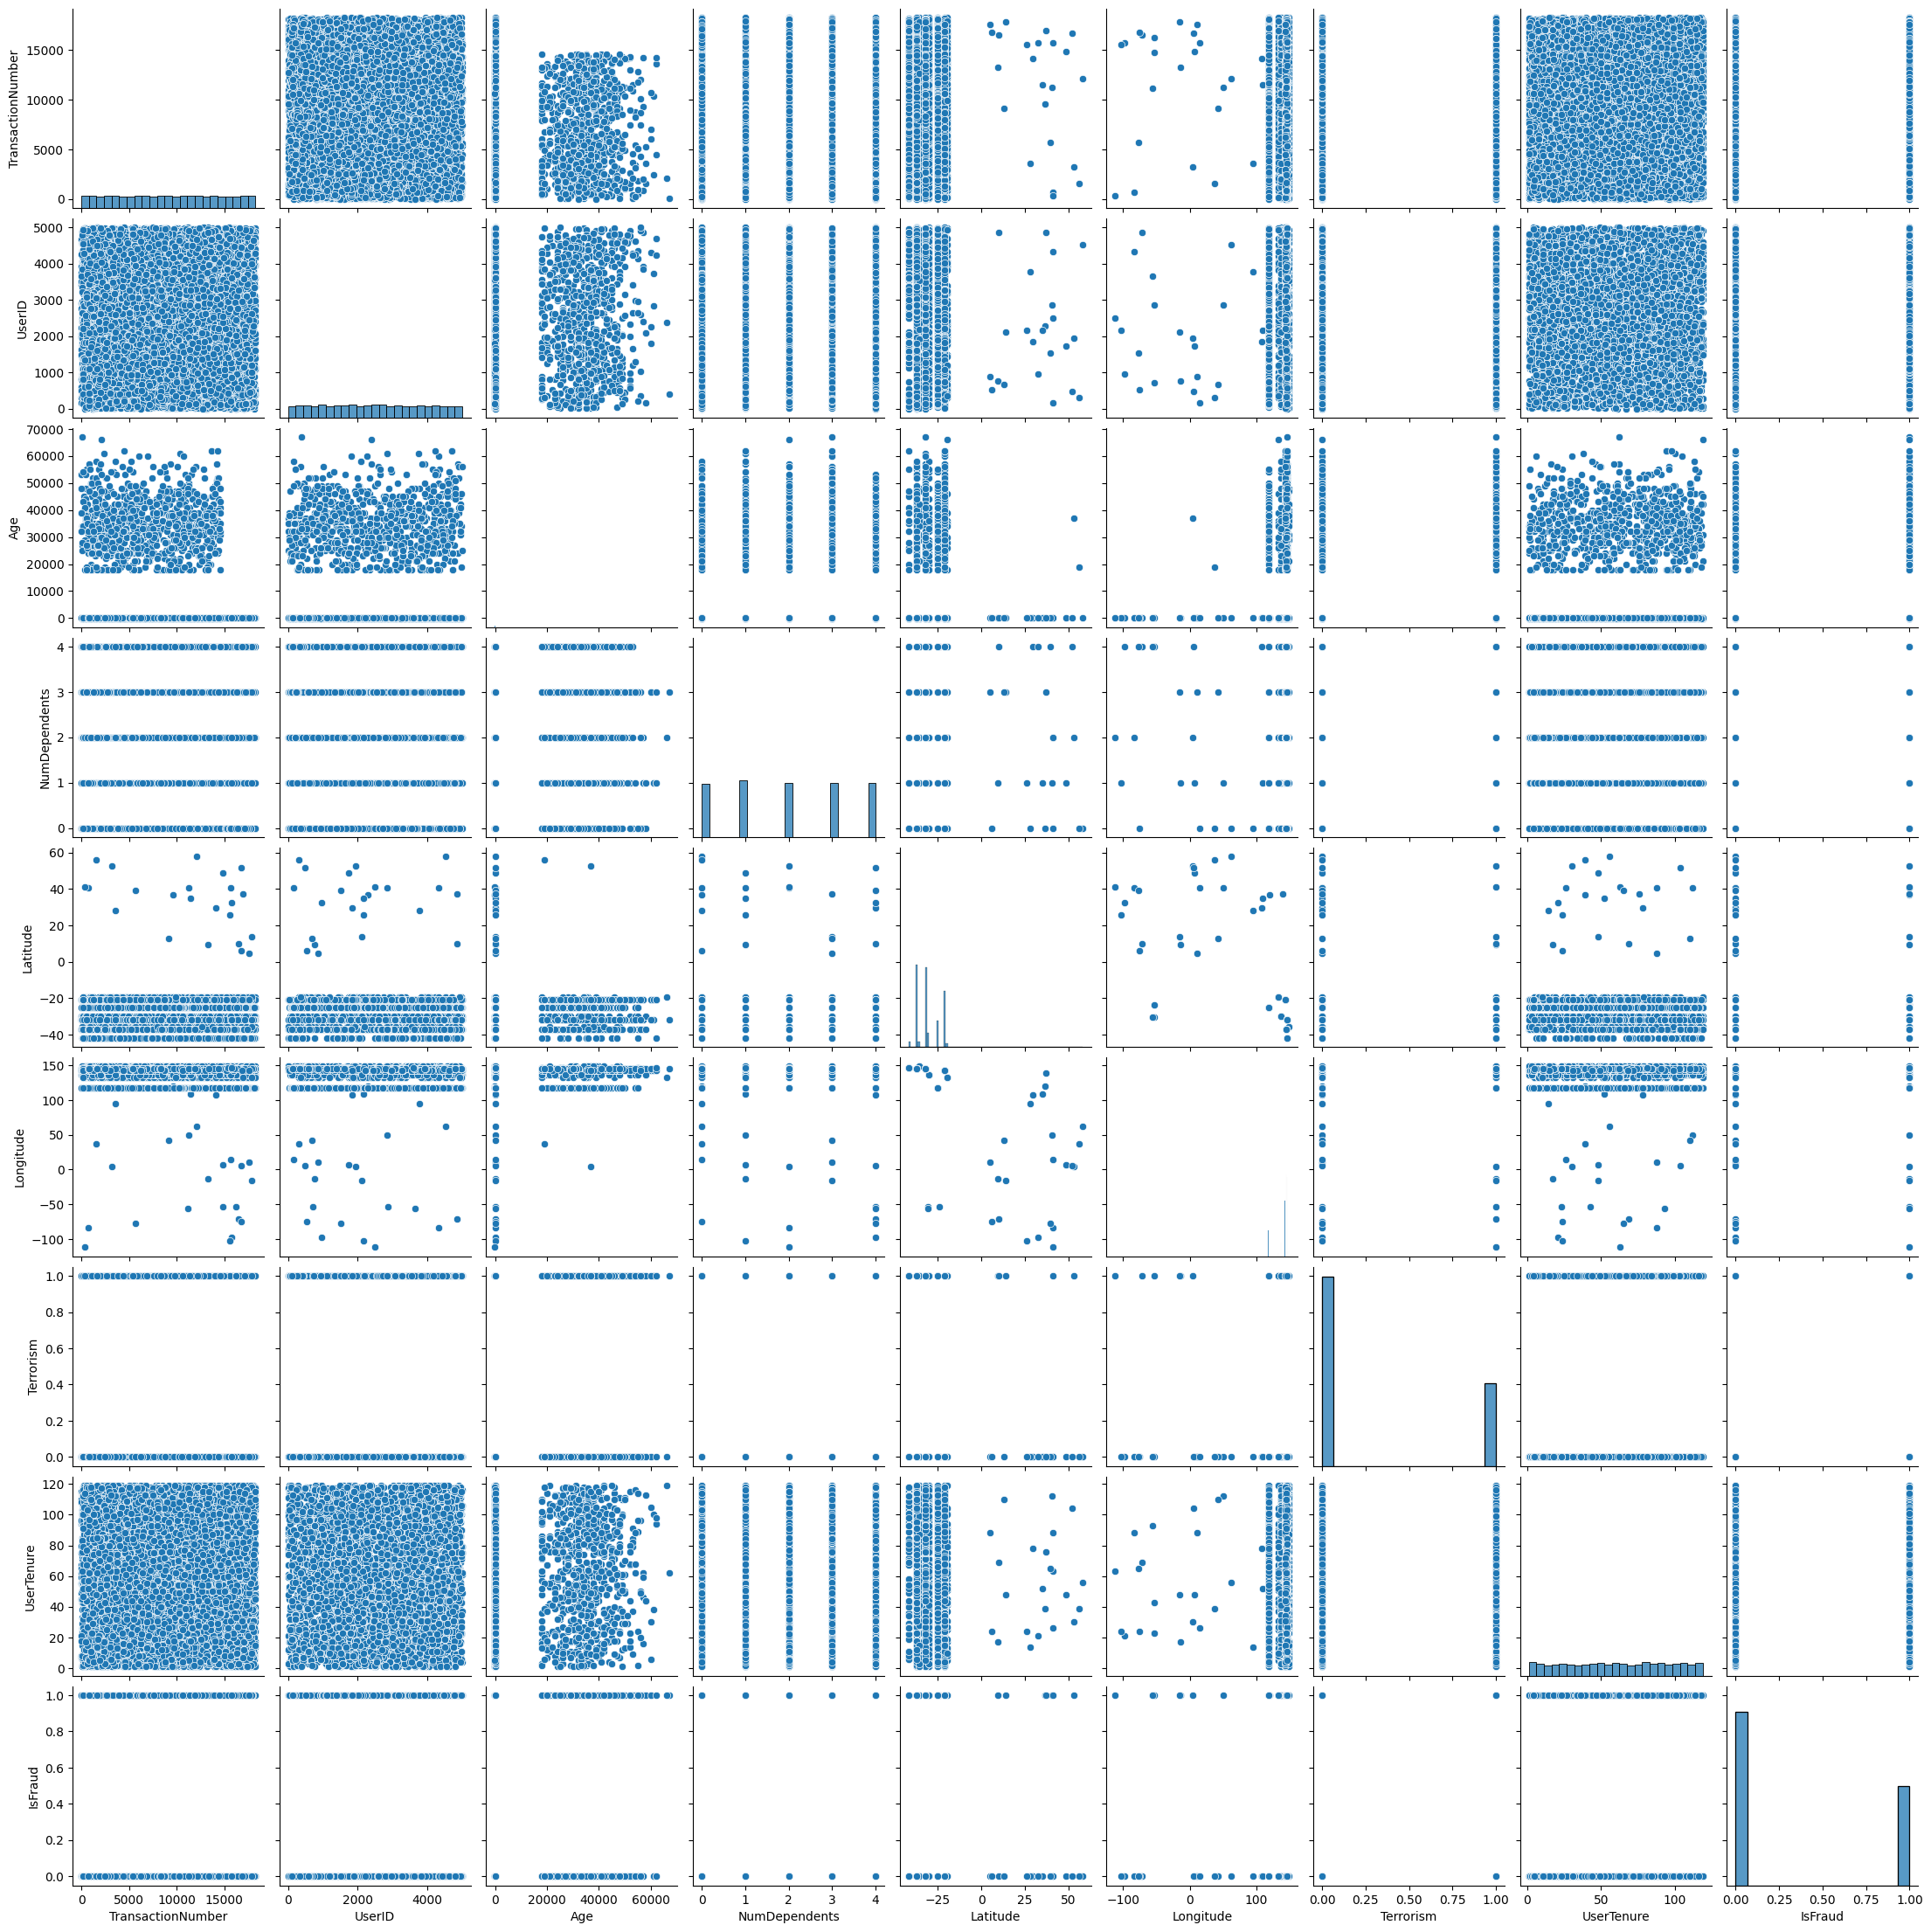

In [34]:
sns.pairplot(df) 

# Encoding

In [35]:
# Gender cleansing:

df['Gender'].value_counts()

Gender
Male           4887
Female         4426
isnotfemale     292
he              268
man             263
fem             220
she             207
woman           206
isnotmale       197
Name: count, dtype: int64

In [36]:
gender_correction = {"isnotfemale": "Male", "he": "Male", "he": "Male", "man": "Male", "man": "Male","fem": "Female", "she":"Female","woman":"Female","isnotmale":"Female"}
df['Gender']=df['Gender'].replace(gender_correction)
df['Gender'].value_counts()


Gender
Male      5710
Female    5256
Name: count, dtype: int64

In [37]:
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/3732448866.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})


In [38]:
df['Occupation'].value_counts()

Occupation
Professional    5384
Student         3321
Unemployed      1151
Retired         1110
Name: count, dtype: int64

In [39]:
df["Occupation"] = df["Occupation"].replace({"Student": 0,"Unemployed":1, "Professional":2,"Retired":3})
df['Occupation'].value_counts()

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/2217682057.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Occupation"] = df["Occupation"].replace({"Student": 0,"Unemployed":1, "Professional":2,"Retired":3})


Occupation
2    5384
0    3321
1    1151
3    1110
Name: count, dtype: int64

In [40]:
df['EducationLevel'].value_counts()

EducationLevel
Bachelor       4367
High School    4331
Master         1641
PhD             627
Name: count, dtype: int64

In [41]:
df["EducationLevel"] = df["EducationLevel"].replace({"High School": 0,"Bachelor":1, "Master":2,"PhD":3})
df['EducationLevel'].value_counts()

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/4197273118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["EducationLevel"] = df["EducationLevel"].replace({"High School": 0,"Bachelor":1, "Master":2,"PhD":3})


EducationLevel
1    4367
0    4331
2    1641
3     627
Name: count, dtype: int64

In [42]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     5366
Single      4418
Divorced     626
Widowed      556
Name: count, dtype: int64

In [43]:
df["MaritalStatus"] = df["MaritalStatus"].replace({"Married": 0,"Single":1, "Divorced":2,"Widowed":3})
df['MaritalStatus'].value_counts()

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/885268059.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MaritalStatus"] = df["MaritalStatus"].replace({"Married": 0,"Single":1, "Divorced":2,"Widowed":3})


MaritalStatus
0    5366
1    4418
2     626
3     556
Name: count, dtype: int64

In [44]:
df['TransactionType'].value_counts()

TransactionType
Purchase      5440
Transfer      2244
Withdrawal    2159
Payment       1123
Name: count, dtype: int64

In [46]:
df["TransactionType"] = df["TransactionType"].replace({"Purchase": 0,"Transfer":1, "Withdrawal":2,"Payment":3})
df['TransactionType'].value_counts()

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_56277/1956010274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TransactionType"] = df["TransactionType"].replace({"Purchase": 0,"Transfer":1, "Withdrawal":2,"Payment":3})


TransactionType
0    5440
1    2244
2    2159
3    1123
Name: count, dtype: int64

In [47]:
df['DeviceType'].value_counts()

DeviceType
Mobile        4893
Desktop       3325
Tablet        1125
galaxys7       344
iphone 15      340
android        338
smartphone     306
mob            295
Name: count, dtype: int64

In [49]:
df["DeviceType"] = df["DeviceType"].replace({"galaxys7": "Mobile","iphone 15":"Mobile", "android":"Mobile","smartphone":"Mobile","mob":"Mobile"})
df["DeviceType"].value_counts()


DeviceType
Mobile     6516
Desktop    3325
Tablet     1125
Name: count, dtype: int64

In [52]:
df["DeviceType"] = df["DeviceType"].replace({"Mobile":0,"Desktop":1,"Tablet":2})
df["DeviceType"].value_counts()

DeviceType
0    6516
1    3325
2    1125
Name: count, dtype: int64

In [56]:
df["TransactionDate"] =pd.to_datetime(df["TransactionDate"])